In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

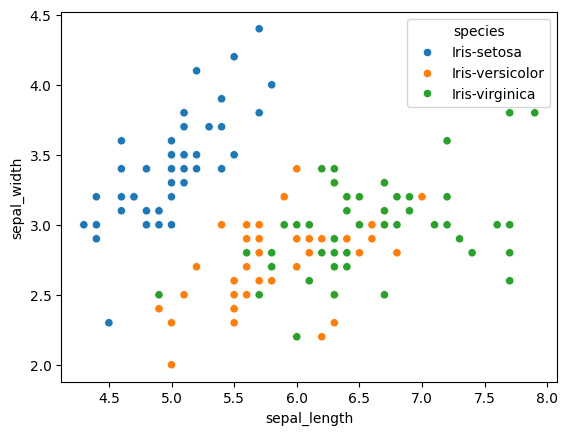

In [22]:
sns.scatterplot(df,x=df.sepal_length,y=df.sepal_width,hue = 'species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

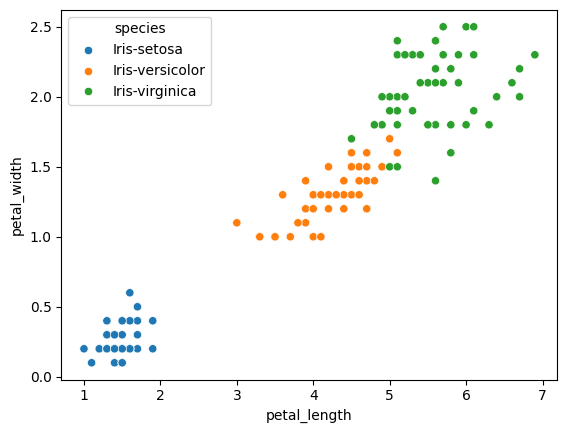

In [23]:
sns.scatterplot(df,x= df.petal_length,y = df.petal_width,hue = 'species')

In [3]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
df_scaled = scaler.fit_transform(df[features])

In [7]:
df_scaled = pd.DataFrame(df_scaled,columns=features)

In [9]:
df_scaled['species'] = df['species']

In [11]:
df_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


In [15]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

In [16]:
model.fit_transform(df_scaled[['petal_length','petal_width']])

array([[0.06834421, 3.40146382, 2.21359223],
       [0.06834421, 3.40146382, 2.21359223],
       [0.10974418, 3.44131741, 2.25622042],
       [0.06136361, 3.36209966, 2.17161643],
       [0.06834421, 3.40146382, 2.21359223],
       [0.24510321, 3.09456801, 1.91271642],
       [0.08212885, 3.30840299, 2.12799436],
       [0.06136361, 3.36209966, 2.17161643],
       [0.06834421, 3.40146382, 2.21359223],
       [0.19042468, 3.4587151 , 2.26320984],
       [0.06136361, 3.36209966, 2.17161643],
       [0.09657883, 3.32324233, 2.1303316 ],
       [0.19278744, 3.49699187, 2.30351718],
       [0.28051348, 3.61475899, 2.42841796],
       [0.16088523, 3.48164362, 2.29946473],
       [0.20611698, 3.17638677, 2.00180597],
       [0.22530536, 3.26012029, 2.09328445],
       [0.08212885, 3.30840299, 2.12799436],
       [0.15307215, 3.18844894, 1.99888579],
       [0.07641799, 3.26791805, 2.08429542],
       [0.14613988, 3.2849098 , 2.08977868],
       [0.20611698, 3.17638677, 2.00180597],
       [0.

In [17]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
df_scaled['species'] = df_scaled['species'].map({
    'Iris-setosa':0,
    'Iris-virginica':1,
    'Iris-versicolor':2
})

In [27]:
from sklearn.metrics import classification_report
print(classification_report(df_scaled['species'],model.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.92      0.94        50
           2       0.92      0.96      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [25]:
from sklearn.metrics import silhouette_score
print(silhouette_score(df_scaled[['species']],model.labels_))

0.8819021189739684
